## 思维导图

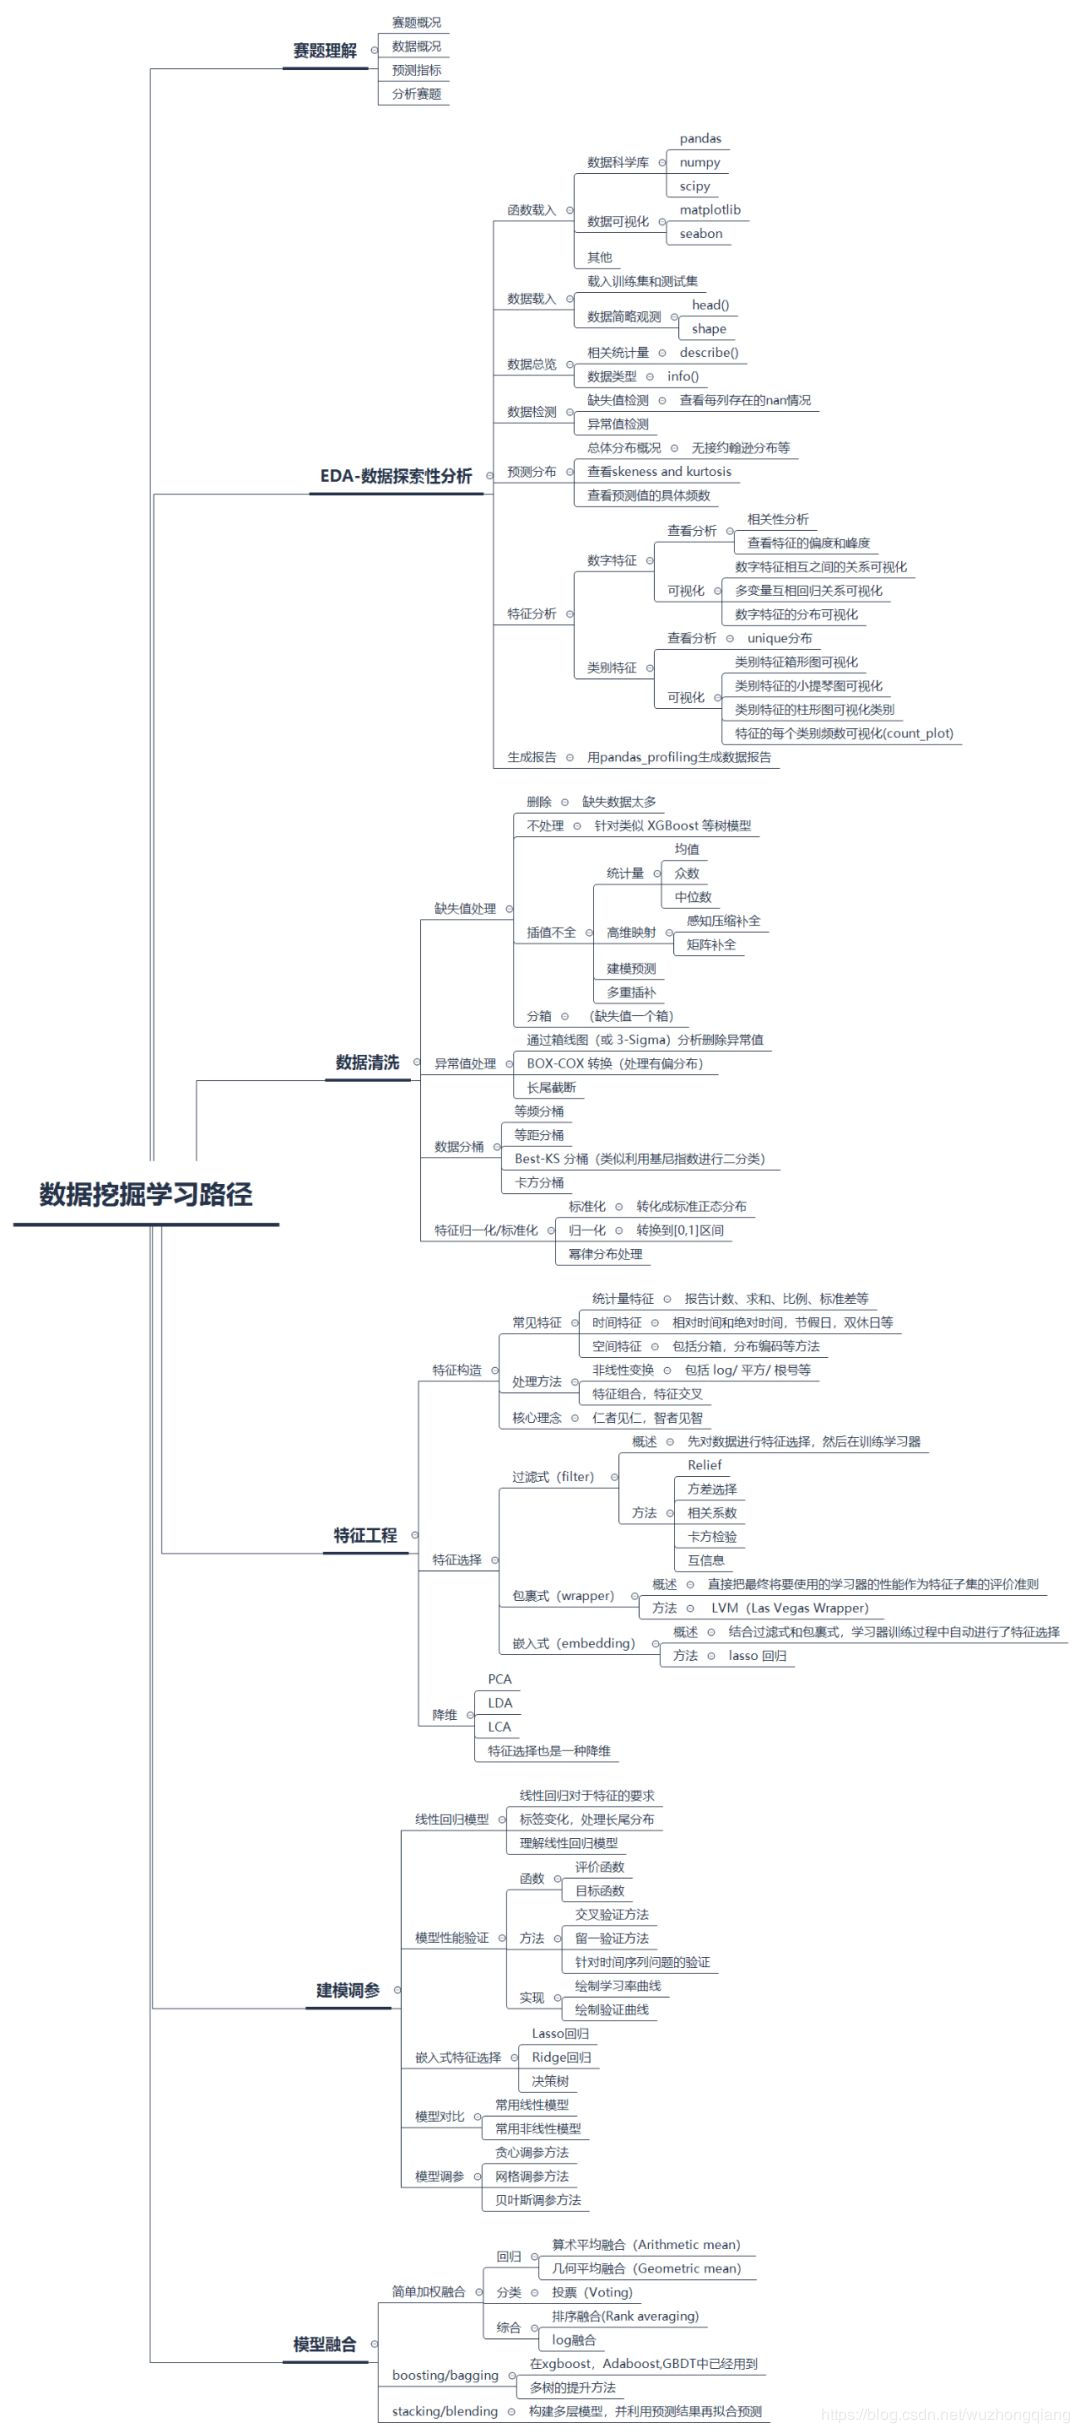

## 零基础入门数据挖掘-Task1 赛题理解


### 了解赛题


- 赛题概况
- 数据概况
- 预测指标
- 分析赛题

### 赛题概况
赛题以预测二手车的交易价格为任务，该数据来自某交易平台的二手车交易记录，**总数据量超过40w，包含31列变量信息，其中15列为匿名变量**。为了保证比赛的公平性，将会从中抽取15万条作为训练集，5万条作为测试集A，5万条作为测试集B，同时会对name、model、brand和regionCode等信息进行脱敏。

### 数据概况

---
一般而言，对于数据在比赛界面都有对应的数据概况介绍（匿名特征除外），说明列的性质特征。了解列的性质会有助于我们对于数据的理解和后续分析。 Tip:匿名特征，就是未告知数据列所属的性质的特征列。

---
train.csv

- SaleID - 销售样本ID
- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶公里
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 【匿名特征，包含v0-14在内15个匿名特征】


数字全都脱敏处理，都为label encoding形式，即数字形式

### 预测指标

评价标准为MAE(Mean Absolute Error):

$$
MAE=\frac{\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n}
$$

其中$y_{i}$代表第$i$个样本的真实值，其中$\hat{y}_{i}$代表第$i$个样本的预测值。

---

分类算法常见的评估指标如下：

- 对于二类分类器/分类算法，评价指标主要有accuracy， [Precision，Recall，F-score，Pr曲线]，ROC-AUC曲线。
- 对于多类分类器/分类算法，评价指标主要有accuracy， [宏平均和微平均，F-score]。

对于回归预测类常见的评估指标如下:
- 平均绝对误差（Mean Absolute Error，MAE），均方误差（Mean Squared Error，MSE），平均绝对百分误差（Mean Absolute Percentage Error，MAPE），均方根误差（Root Mean Squared Error）， R2（R-Square）

平均绝对误差（Mean Absolute Error，MAE）:平均绝对误差，其能更好地反映预测值与真实值误差的实际情况，其计算公式如下：
$$MAE=\frac{1}{N} \sum_{i=1}^{N}\left|y_{i}-\hat{y}_{i}\right|$$

均方误差（Mean Squared Error，MSE）,均方误差,其计算公式为：
$$MSE=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}$$

R2（R-Square）的公式为： 残差平方和：
$$SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}$$

总平均值:
$$SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}$$

其中$\overline{y}$表示$y$的平均值，接着可以得到$R^2$的表达式为:
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$

$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。

### 分析赛题


- 1.此题为传统的数据挖掘问题，通过数据科学以及机器学习深度学习的办法来进行建模得到结果。
- 2.此题是一个典型的回归问题。
- 3.主要应用xgb、lgb、catboost，以及pandas、numpy、matplotlib、seabon、sklearn、keras等等数据挖掘常用库或者框架来进行数据挖掘任务。
- 4.通过EDA来挖掘数据的联系和自我熟悉数据。

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from IPython.display import Image
%matplotlib inline

## 字段表

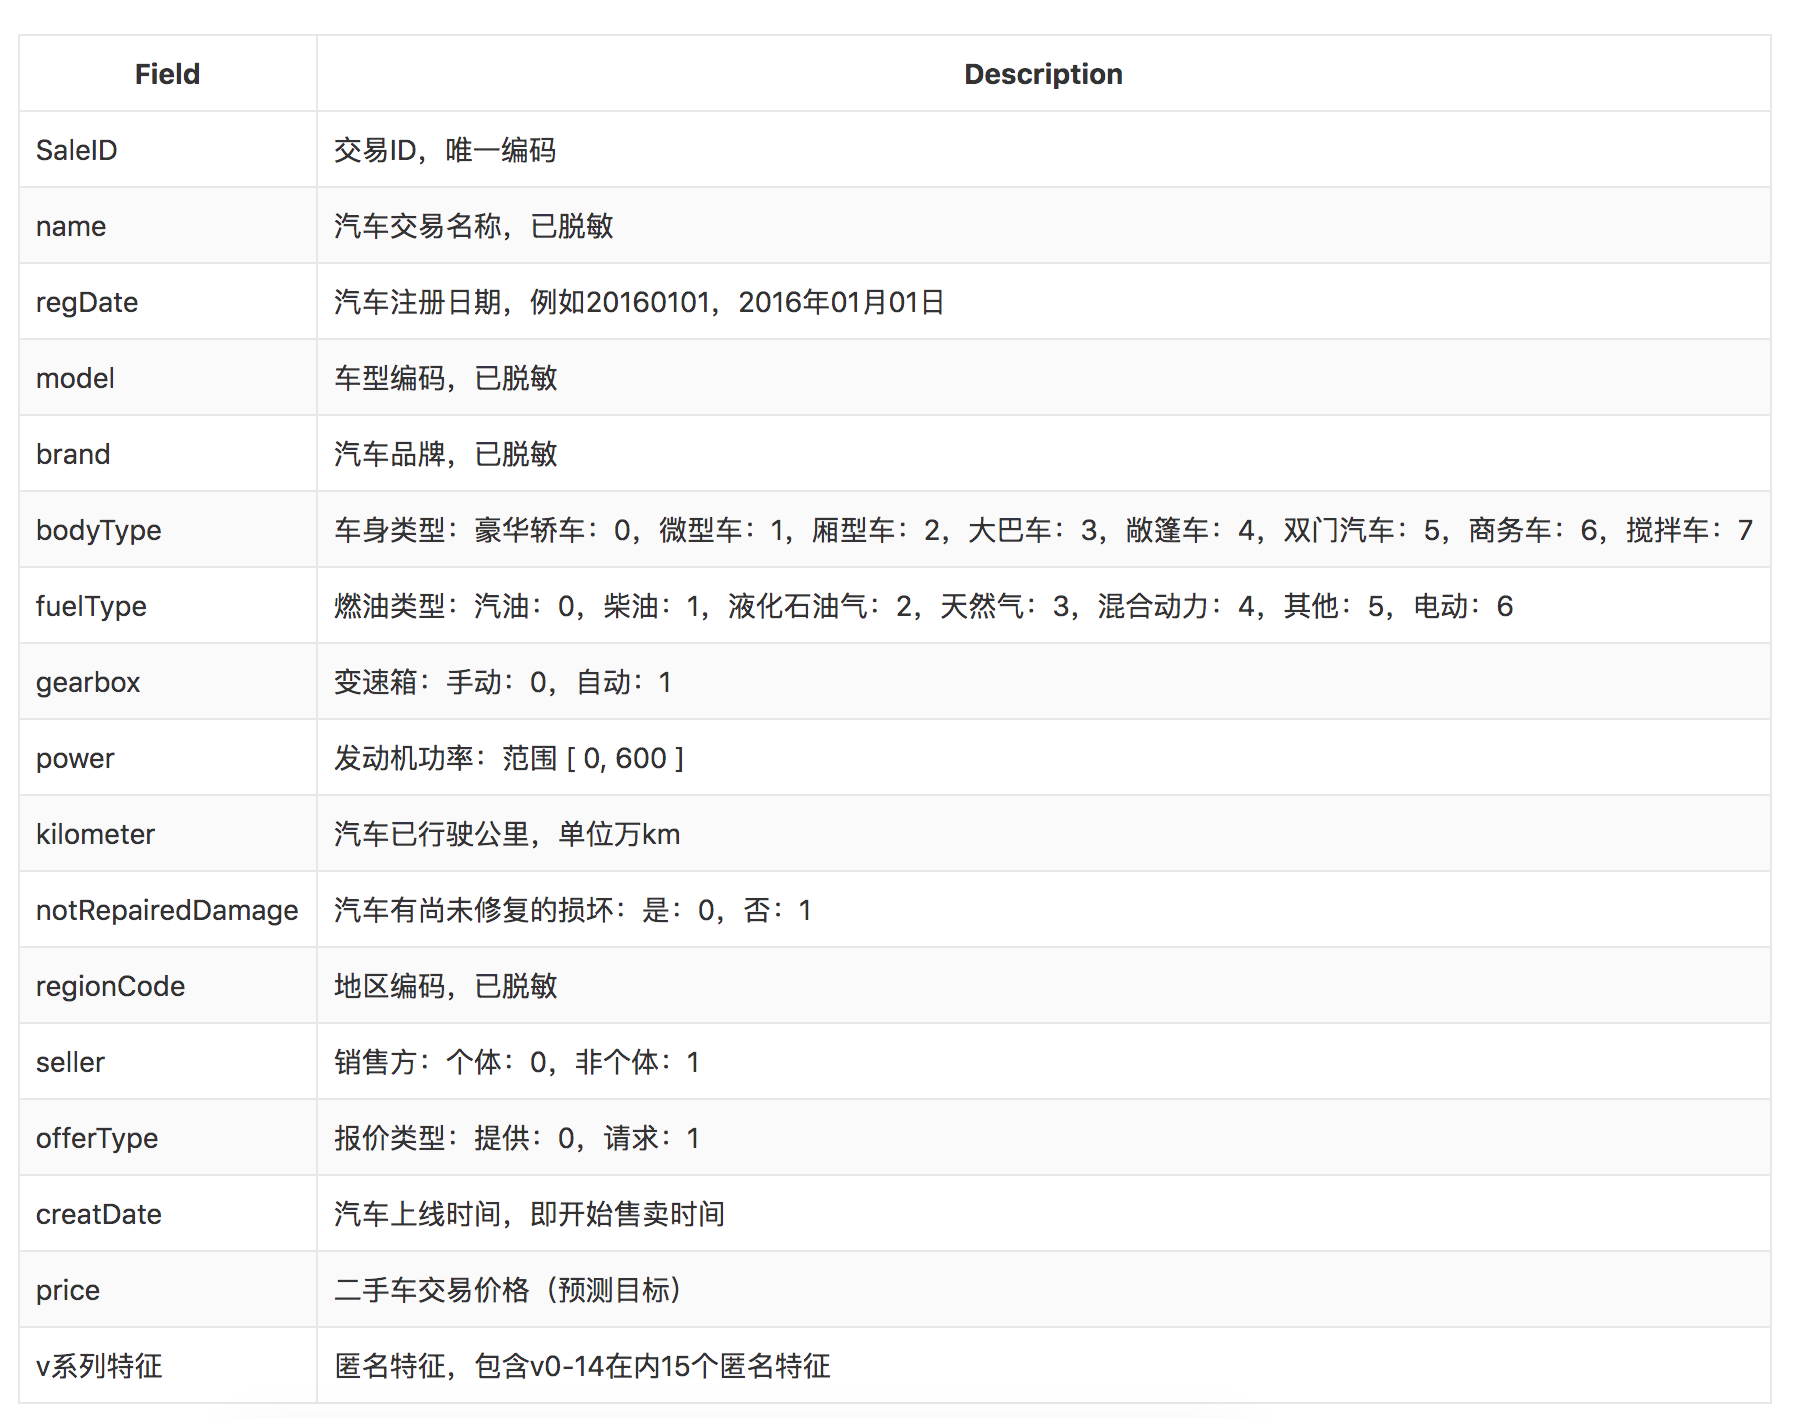

### 查看数据整体情况

```python
dataset.head(), dataset.tail()  # 首先查看头尾五行，看一下数据是怎样的
dataset.shape  # 看一下数据规模，几个样本，几个特征
dataset.columns  # 看一下特征的名字，对感兴趣的／觉得重要的特征可以重点留意探查
dataset.info()  # 看一下各列数据类型，看一下各列有无缺失值
dataset.describe()  # 看一下各列的描述性统计结果，看一下各列有无异常值（如果max或min离mean或75%差很多个std就可能是异常值）
```

In [43]:
train = pd.read_csv('./data/cars_transaction/used_car_train_20200313.csv', sep=' ')
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [44]:
test = pd.read_csv('./data/cars_transaction/used_car_testA_20200313.csv', sep=' ')
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [45]:
train.shape, test.shape

((150000, 31), (50000, 30))

In [46]:
train.tail()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [47]:
train.columns  # #看一下特征的名字，对感兴趣的／觉得重要的特征可以重点留意探查

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [48]:
train.info(verbose=True)  # #看一下各列数据类型，看一下各列有无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [49]:
train.describe()  # 看一下各列的描述性统计结果，看一下各列有无异常值（如果max或min离mean或75%差很多个std就可能是异常值）

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


### 查看目标变量 y 的类型

```python
# quality为目标变量，希望学习一个给定其他特征指标能够预测红酒质量的模型 #
dataset.quality.unique()  # 查看有哪些类别
dataset.quality.value_counts()  # 分类变量各类数量
dataset.quality.plot(kind='hist', density=True)  # 类别变量画直方图
plt.show()
```

## 探索性数据分析

### 缺失值检查

In [50]:
# 求空值数量
train.isnull().sum().sort_values(ascending=False).head()

fuelType    8680
gearbox     5981
bodyType    4506
model          1
v_14           0
dtype: int64

In [51]:
# 求空值数量
train.isnull().sum().sort_values(ascending=False)

fuelType             8680
gearbox              5981
bodyType             4506
model                   1
v_14                    0
creatDate               0
name                    0
regDate                 0
brand                   0
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
price                   0
v_13                    0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
SaleID                  0
dtype: int64

### 价格数据分布

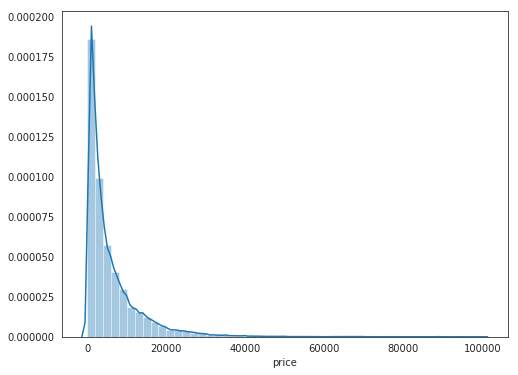

In [52]:
# 目标值分布，右偏分布
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("white")
sns.distplot(train['price'])

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SaleID,150000.0,7.499950e+04,43301.414527,0.000000e+00,3.749975e+04,7.499950e+04,1.124992e+05,1.499990e+05
name,150000.0,6.834917e+04,61103.875095,0.000000e+00,1.115600e+04,5.163800e+04,1.188412e+05,1.968120e+05
regDate,150000.0,2.003417e+07,53649.879255,1.991000e+07,1.999091e+07,2.003091e+07,2.007111e+07,2.015121e+07
model,149999.0,4.712902e+01,49.536040,0.000000e+00,1.000000e+01,3.000000e+01,6.600000e+01,2.470000e+02
brand,150000.0,8.052733e+00,7.864956,0.000000e+00,1.000000e+00,6.000000e+00,1.300000e+01,3.900000e+01
bodyType,145494.0,1.792369e+00,1.760640,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
fuelType,141320.0,3.758421e-01,0.548677,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
gearbox,144019.0,2.249425e-01,0.417546,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
power,150000.0,1.193165e+02,177.168419,0.000000e+00,7.500000e+01,1.100000e+02,1.500000e+02,1.931200e+04
kilometer,150000.0,1.259716e+01,3.919576,5.000000e-01,1.250000e+01,1.500000e+01,1.500000e+01,1.500000e+01


In [8]:
# 查看分类特征的类别数量
“”“
name: 汽车交易名称
model: 车型编码
brand: 汽车品牌
regionCode: 地区编码
”“”
for i in ['name', 'model', 'brand', 'regionCode']:
    print(i, train[i].nunique())

SyntaxError: invalid character in identifier (<ipython-input-8-8b8e21a8bf9c>, line 2)

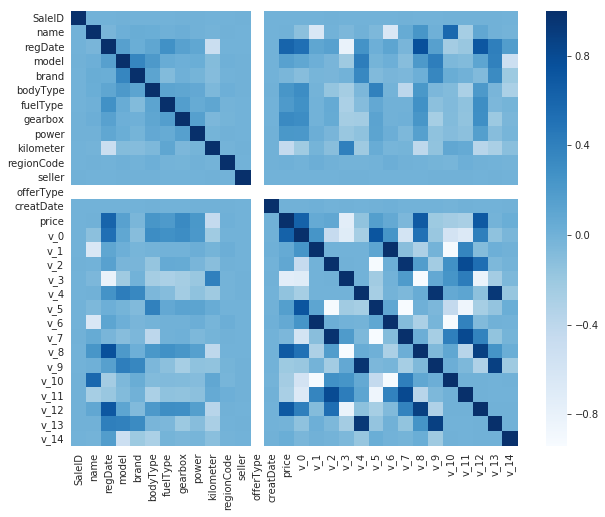

In [9]:
# 查看特征相关系数
corr = train.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues")

## 特征工程

### 处理倾斜特征

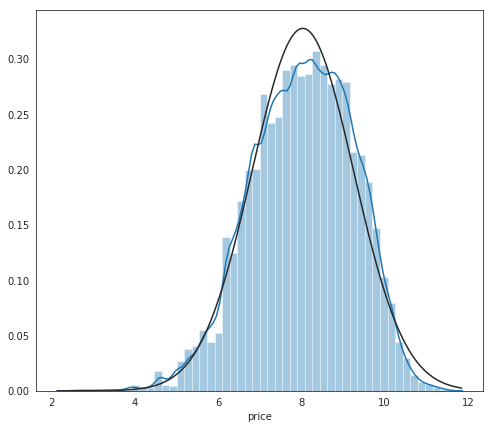

In [10]:
from scipy.stats import norm

# 目标值做log处理
train['price'] = np.log1p(train['price'])


# 查看转化后的分布，有点正态的感觉了
fig, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train['price'], fit=norm)

### 移除异常值

In [11]:
# 可以根据计算结果或者其他特征进行移除
train.drop(train[train['price'] < 4].index, inplace=True)

In [12]:
# 整合训练集测试集以便后续特征工程
train_labels = train['price'].reset_index(drop=True)
train_features = train.drop(['price'], axis=1)
test_features = test
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)

### 填充缺失值

In [13]:
# 根据最常出现填充，都是零，也可以根据其他来填充，不是瞎填的。。
def fill_missing(df):
    df['fuelType'] = df['fuelType'].fillna(0)
    df['gearbox'] = df['gearbox'].fillna(0)
    df['bodyType'] = df['bodyType'].fillna(0)
    df['model'] = df['model'].fillna(0)
    return df

In [14]:
all_features = fill_missing(all_features)

all_features.isnull().sum().head()

SaleID     0
name       0
regDate    0
model      0
brand      0
dtype: int64

### 数据类型转换

In [15]:
# 处理完
def data_astype(df):
    # string
    df['SaleID'] = df['SaleID'].astype(int).astype(str)
    df['name'] = df['name'].astype(int).astype(str)
    df['model'] = df['model'].astype(str)
    df['brand'] = df['brand'].astype(str)
    df['bodyType'] = df['bodyType'].astype(str)
    df['fuelType'] = df['fuelType'].astype(str)
    df['gearbox'] = df['gearbox'].astype(str)
    df['notRepairedDamage'] = df['notRepairedDamage'].astype(str)
    df['regionCode'] = df['regionCode'].astype(int).astype(str)
    df['seller'] = df['seller'].astype(int).astype(str)
    df['offerType'] = df['offerType'].astype(int).astype(str)
    df['regDate'] = df['regDate'].astype(str)
    df['creatDate'] = df['creatDate'].astype(str)
    
    # date
    df['creatDate'] = pd.to_datetime(df['creatDate'])
    return df

In [16]:
all_features = data_astype(all_features)

### 编码分类变量

In [17]:
# 先删除掉一些不要的特征
all_features = all_features.drop(['SaleID', 'name', 'regDate', 'model', 'seller',
                                  'offerType', 'creatDate', 'regionCode'], axis=1)

In [18]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(199766, 77)

### 重新创建训练集和测试集

In [19]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((149766, 77), (149766,), (50000, 77))

### 训练模型

In [20]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score

### 设置交叉验证

In [21]:
# K折交叉验证
kf = KFold(n_splits=5, random_state=15, shuffle=True)

In [22]:
# 定义评测指标
def cv_mae(model, X):
    mae = -cross_val_score(model, X, train_labels, scoring='neg_mean_absolute_error')
    return mae

### 定义模型

In [23]:
ridge_alphas = [0.1, 1, 3, 5, 10]
ridge = RidgeCV(alphas=ridge_alphas, cv=kf)

### 训练模型

In [24]:
# 查看交叉验证分数
score = cv_mae(ridge, X)

In [25]:
score

array([0.19779685, 0.19911369, 0.19930195, 0.19632974, 0.20047872])

In [26]:
score.mean()

0.19860419017498415

In [27]:
ridge.fit(X, train_labels)

RidgeCV(alphas=array([ 0.1,  1. ,  3. ,  5. , 10. ]),
        cv=KFold(n_splits=5, random_state=15, shuffle=True), fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [28]:
# 查看R的平方
ridge.score(X, train_labels)

0.9368702755273356

### 模型预测

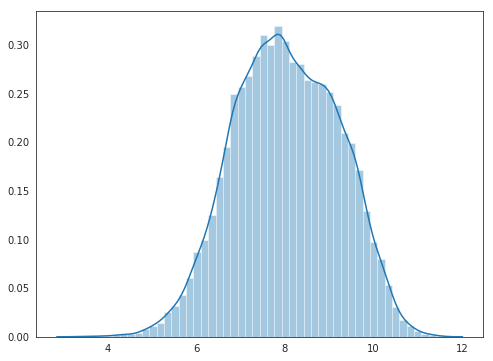

In [29]:
# 查看预测结果
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(ridge.predict(X_test))

In [30]:
# 预测结果
submission = test[['SaleID']].copy()
submission['price'] = np.expm1(ridge.predict(X_test))
submission.shape

(50000, 2)

In [31]:
submission.to_csv('./data/cars_transaction/submission.csv', index=False)

## Reference

[零基础数据挖掘入门系列(一) - 赛题理解](https://blog.csdn.net/wuzhongqiang/article/details/105000745)
[]()
[]()
[]()